In [1]:
import numpy as np
import pandas as pd
from scratch import *

Linear Regression
Training loss after  0  iterations is  1.5811388300841898
Training loss after  500  iterations is  0.11515089871796896
Training loss after  1000  iterations is  0.11515089872154656
Training loss after  1500  iterations is  0.11515089872154524
Training loss after  2000  iterations is  0.11515089872154423
Training loss after  2500  iterations is  0.11515089872154423
Training loss after  3000  iterations is  0.11515089872154423
Training loss after  3500  iterations is  0.11515089872154423
Training loss after  4000  iterations is  0.11515089872154423
Training loss after  4500  iterations is  0.11515089872154423
Predicted Values: [[2.76462962]
 [2.76462962]]
True Values: [3]


In [2]:
""" Running Linear Regression on Alabone dataset """

' Running Linear Regression on Alabone dataset '

In [3]:
pp = MyPreProcessor()
X,Y = pp.pre_process(0)
print(X)
print(Y)

[[ 2.13626242  0.00849443 -0.19450817 ... -0.33811371 -0.55916099
  -0.53284584]
 [ 3.63998538 -0.09676618 -0.28473155 ... -0.57043891 -0.70051095
  -0.53510142]
 [ 3.63998538 -0.11180341 -0.28473155 ... -0.46968947 -0.65765484
  -0.61254316]
 ...
 [ 0.63253946  0.0460875  -0.1569151  ... -0.18473397 -0.52833467
  -0.4711932 ]
 [ 2.13626242 -0.14939648 -0.31480601 ... -0.49901207 -0.6448732
  -0.63133969]
 [ 0.63253946  0.06864335 -0.1569151  ... -0.11857016 -0.51705675
  -0.40427753]]
[[ 6.]
 [12.]
 [ 7.]
 ...
 [10.]
 [15.]
 [10.]]


In [4]:
def k_fold_cross_validation(X, y, k=5, loss = "rmse", epochs = 8000, learning_rate = 0.01):
    """ Performs K fold cross validation
    Parameters
    ----------
    model : instance of the model to be used
    X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as data.
    y : 1-dimensional numpy array of shape (n_samples,) which acts as labels.
    k : number of folds, default = 5
    
    Returns
    -------
    model : instance of model
    """
    m = X.shape[0]  #number of examples
    fold_size = int(m/k)
    start = 0
    end = fold_size
    models = {}
    for i in range(k):
        Xtrain_i = np.concatenate((X[0:start], X[end+1:]))
        ytrain_i = np.concatenate((y[0:start],y[end+1:]))
        X_test =  X[start:end]
        y_test = y[start:end]
        model = MyLinearRegression()
        model.fit(Xtrain_i,ytrain_i,X_test,y_test,epochs,learning_rate, loss)
        if(loss == "rmse"):
            models[i] = (model.rmse_train_history[-1], model.rmse_val_history[-1], np.array(model.rmse_train_history), np.array(model.rmse_val_history))
        if(loss == "mae"):
            models[i] = (model.mae_train_history[-1], model.mae_val_history[-1], np.array(model.mae_train_history), np.array(model.mae_val_history))
        print(model.W)
        print(model.b)
        start+=fold_size
        end+=fold_size
        
    avg_train = 0
    avg_val  = 0
    for i in range(len(models)):
        avg_train+=models[i][2]
        avg_val+=models[i][3]
            
    
    avg_train = avg_train/k
    avg_val = avg_val/k
    return models, avg_train, avg_val
    

In [5]:
models_mae,avg_train_loss, avg_val_loss = k_fold_cross_validation(X,Y, epochs = 5000, learning_rate = 0.01, loss = "mae")


Training loss after  0  iterations is :  10.010778443113772  | validation loss is :  9.619161676646707
Training loss after  500  iterations is :  2.9938461134611094  | validation loss is :  2.721128639255937
Training loss after  1000  iterations is :  2.1137952185299502  | validation loss is :  1.890837577219462
Training loss after  1500  iterations is :  1.9738674624236854  | validation loss is :  1.771705880618626
Training loss after  2000  iterations is :  1.9397884689663611  | validation loss is :  1.7367318878537754
Training loss after  2500  iterations is :  1.9245649909556333  | validation loss is :  1.7227344405208
Training loss after  3000  iterations is :  1.9129968025505688  | validation loss is :  1.712532075968837
Training loss after  3500  iterations is :  1.902574220022296  | validation loss is :  1.7035768880366224
Training loss after  4000  iterations is :  1.8928921065519324  | validation loss is :  1.6953310900103733
Training loss after  4500  iterations is :  1.8836

In [6]:
import matplotlib.pyplot as plt

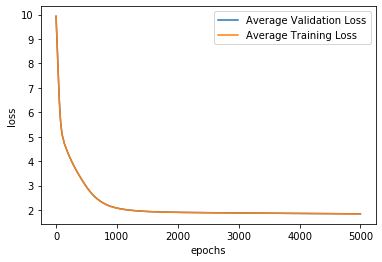

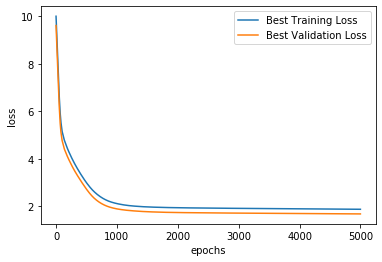

In [7]:
plt.plot([x for x in range(len(avg_val_loss))],avg_val_loss, label = "Average Validation Loss")
plt.plot([x for x in range(len(avg_train_loss))], avg_train_loss, label = "Average Training Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot([x for x in range(len(models_mae[0][2]))],models_mae[0][2], label = "Best Training Loss")
plt.plot([x for x in range(len(models_mae[0][3]))], models_mae[0][3], label = "Best Validation Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
models,avg_train_loss, avg_val_loss = k_fold_cross_validation(X,Y)

Training loss after  0  iterations is :  10.536193679195014  | validation loss is :  10.058868640326967
Training loss after  500  iterations is :  3.891438129249002  | validation loss is :  3.500262862731633
Training loss after  1000  iterations is :  3.0304417326909006  | validation loss is :  2.680896808741341
Training loss after  1500  iterations is :  2.82558999429007  | validation loss is :  2.5156933516130895
Training loss after  2000  iterations is :  2.7631191613037553  | validation loss is :  2.47095439053567
Training loss after  2500  iterations is :  2.7352252717453367  | validation loss is :  2.451275279369472
Training loss after  3000  iterations is :  2.717346787676429  | validation loss is :  2.4379277220024504
Training loss after  3500  iterations is :  2.7026024865091345  | validation loss is :  2.4260918556163764
Training loss after  4000  iterations is :  2.68898371211899  | validation loss is :  2.4145826080512993
Training loss after  4500  iterations is :  2.675904

Training loss after  5000  iterations is :  2.579850966171942  | validation loss is :  2.7506186609290415
Training loss after  5500  iterations is :  2.5681425894592604  | validation loss is :  2.737985540161827
Training loss after  6000  iterations is :  2.5567125285573793  | validation loss is :  2.725735948672915
Training loss after  6500  iterations is :  2.5455548340565515  | validation loss is :  2.7138261300877247
Training loss after  7000  iterations is :  2.53466562047027  | validation loss is :  2.702232267534609
Training loss after  7500  iterations is :  2.5240414845127583  | validation loss is :  2.6909403905190903
[[-0.30806295]
 [ 1.03573386]
 [ 0.15596091]
 [-2.38556573]
 [ 4.09956056]
 [-3.51328285]
 [-2.62882858]
 [ 0.17092356]]
4.886718309630871


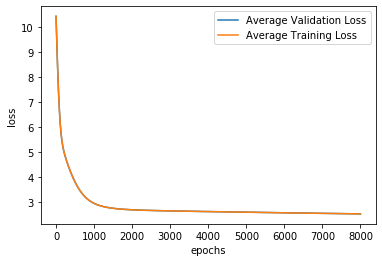

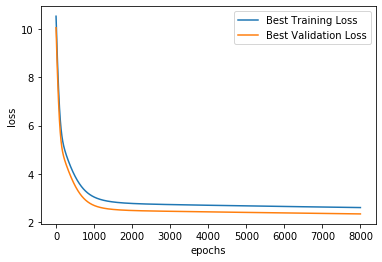

In [9]:
plt.plot([x for x in range(len(avg_val_loss))],avg_val_loss, label = "Average Validation Loss")
plt.plot([x for x in range(len(avg_train_loss))], avg_train_loss, label = "Average Training Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot([x for x in range(len(models[0][2]))],models[0][2], label = "Best Training Loss")
plt.plot([x for x in range(len(models[0][3]))], models[0][3], label = "Best Validation Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
print("Stats for LR MAE Loss")
for i in range(len(models_mae)):
    print("For CV number ",i, "the train loss = ", models_mae[i][0], " and the val loss = ", models_mae[i][1] )
print("Stats for LR RMSE Loss")
for i in range(len(models)):
    print("For CV number ",i, "the train loss = ", models[i][0], " and the val loss = ", models[i][1] )

Stats for LR MAE Loss
For CV number  0 the train loss =  1.87481747654486  and the val loss =  1.6790813891630927
For CV number  1 the train loss =  1.8228108537526135  and the val loss =  1.8857559438287919
For CV number  2 the train loss =  1.8334010568279047  and the val loss =  1.8546375506646744
For CV number  3 the train loss =  1.8446967951554567  and the val loss =  1.8011214004555836
For CV number  4 the train loss =  1.805822952791599  and the val loss =  1.9773369502725655
Stats for LR RMSE Loss
For CV number  0 the train loss =  2.593244097037651  and the val loss =  2.329542937469957
For CV number  1 the train loss =  2.5168814307613854  and the val loss =  2.6602431708040317
For CV number  2 the train loss =  2.546236475827177  and the val loss =  2.539587634286504
For CV number  3 the train loss =  2.548478722155454  and the val loss =  2.5180325830246333
For CV number  4 the train loss =  2.513699540093446  and the val loss =  2.6799631676498543


In [11]:
"""LR on Video Game dataset """

'LR on Video Game dataset '

In [12]:
pp = MyPreProcessor()
X,Y = pp.pre_process(1)
print(X)
print(Y)

[[ 0.85068818 -0.91989366]
 [ 0.97591277 -0.97591234]
 [ 0.97591277 -0.97591234]
 ...
 [ 0.97591277 -0.97591234]
 [ 0.97591277 -0.97591234]
 [ 0.9453717  -0.93251812]]
[[0.07]
 [0.01]
 [0.02]
 ...
 [0.08]
 [1.19]
 [0.29]]


In [13]:
video_game_model_rmse,avg_train_loss, avg_val_loss = k_fold_cross_validation(X,Y, epochs = 2500, learning_rate = 0.005)

Training loss after  0  iterations is :  1.6843023836669495  | validation loss is :  1.4339734545596348
Training loss after  500  iterations is :  1.5837706409242147  | validation loss is :  1.3150987117330353
Training loss after  1000  iterations is :  1.5806537656368347  | validation loss is :  1.3112726375612256
Training loss after  1500  iterations is :  1.578119406747972  | validation loss is :  1.3081590443646351
Training loss after  2000  iterations is :  1.5760541933628676  | validation loss is :  1.3056276521435113
[[ 0.5173866 ]
 [-0.01430619]]
0.03096221385635126
Training loss after  0  iterations is :  1.4726801912820016  | validation loss is :  2.1746726711032434
Training loss after  500  iterations is :  1.3609676939534479  | validation loss is :  2.085475410082844
Training loss after  1000  iterations is :  1.3572794334301936  | validation loss is :  2.08234086230012
Training loss after  1500  iterations is :  1.354370337602475  | validation loss is :  2.079868271225428


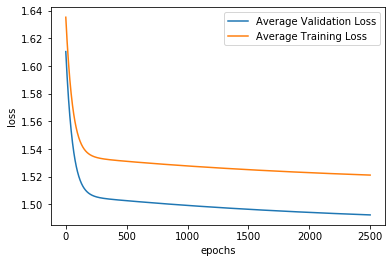

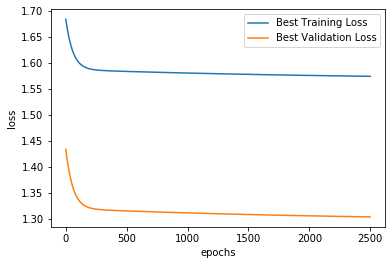

In [14]:
plt.plot([x for x in range(len(avg_val_loss))],avg_val_loss, label = "Average Validation Loss")
plt.plot([x for x in range(len(avg_train_loss))], avg_train_loss, label = "Average Training Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


plt.plot([x for x in range(len(video_game_model_rmse[0][2]))],video_game_model_rmse[0][2], label = "Best Training Loss")
plt.plot([x for x in range(len(video_game_model_rmse[0][3]))], video_game_model_rmse[0][3], label = "Best Validation Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:
video_game_model_mae,avg_train_loss, avg_val_loss = k_fold_cross_validation(X,Y, epochs = 2500,learning_rate = 0.0005,loss = "mae")

Training loss after  0  iterations is :  0.5341465420560748  | validation loss is :  0.5312055040382889
Training loss after  500  iterations is :  0.4620198642498855  | validation loss is :  0.4595950833927773
Training loss after  1000  iterations is :  0.4614597227817614  | validation loss is :  0.45906663267883024
Training loss after  1500  iterations is :  0.4611927892402027  | validation loss is :  0.45878958878893417
Training loss after  2000  iterations is :  0.46097824522442893  | validation loss is :  0.45857324115027953
[[ 0.09029306]
 [-0.04509111]]
0.047883663551401855
Training loss after  0  iterations is :  0.5237233644859813  | validation loss is :  0.5728656895004487
Training loss after  500  iterations is :  0.452200720573515  | validation loss is :  0.4992427815856188
Training loss after  1000  iterations is :  0.4516606376142601  | validation loss is :  0.4984075810890639
Training loss after  1500  iterations is :  0.45141652806304755  | validation loss is :  0.498048

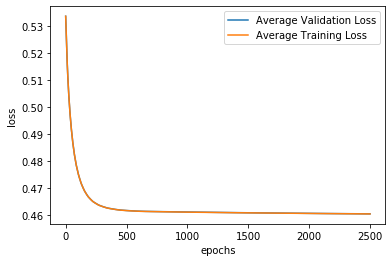

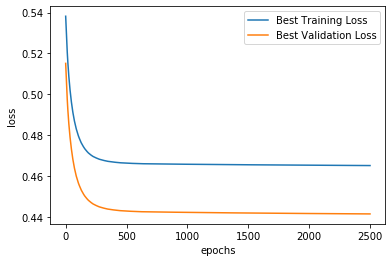

In [16]:
plt.plot([x for x in range(len(avg_val_loss))],avg_val_loss, label = "Average Validation Loss")
plt.plot([x for x in range(len(avg_train_loss))], avg_train_loss, label = "Average Training Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


plt.plot([x for x in range(len(video_game_model_mae[2][2]))],video_game_model_mae[2][2], label = "Best Training Loss")
plt.plot([x for x in range(len(video_game_model_mae[2][3]))], video_game_model_mae[2][3], label = "Best Validation Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
print("Stats for LR MAE Loss")
for i in range(len(video_game_model_mae)):
    print("For CV number ",i, "the train loss = ", video_game_model_mae[i][0], " and the val loss = ", video_game_model_mae[i][1] )
print("Stats for LR RMSE Loss")
for i in range(len(video_game_model_rmse)):
    print("For CV number ",i, "the train loss = ", video_game_model_rmse[i][0], " and the val loss = ", video_game_model_rmse[i][1] )

Stats for LR MAE Loss
For CV number  0 the train loss =  0.4608005978658471  and the val loss =  0.45839460232866347
For CV number  1 the train loss =  0.45104319046715696  and the val loss =  0.497556144876228
For CV number  2 the train loss =  0.4650754590842164  and the val loss =  0.4413936455747876
For CV number  3 the train loss =  0.46318463891549216  and the val loss =  0.4488144241293316
For CV number  4 the train loss =  0.46145531369997006  and the val loss =  0.4555101396303334
Stats for LR RMSE Loss
For CV number  0 the train loss =  1.574375638469892  and the val loss =  1.3035759576783479
For CV number  1 the train loss =  1.3502763584773276  and the val loss =  2.076259728458376
For CV number  2 the train loss =  1.5920857682821916  and the val loss =  1.2144238203502724
For CV number  3 the train loss =  1.5239626775564175  and the val loss =  1.521527409976184
For CV number  4 the train loss =  1.565183092591641  and the val loss =  1.346328790355889
